Merging Fiber Data and Metadata

In [1]:
import pandas as pd

mets = pd.read_csv("/proj/gibbons/2022_fiber_fermented_16S/data/genus_abundances.csv")

In [2]:
abundances_table = pd.read_csv("/proj/gibbons/2022_fiber_fermented_16S/data/genus_abundances.csv")

In [3]:
abundances_table

,Kingdom,Phylum,Class,Order,Family,Genus,sample_id,count
0,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,SRR15032078,341
1,Bacteria,Actinobacteria,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Adlercreutzia,SRR15032078,19
2,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia,SRR15032078,1886
3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,SRR15032078,1100
4,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Anaerostipes,SRR15032078,643
...,...,...,...,...,...,...,...,...
11086,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,NaN,SRR15032514,92
11087,Bacteria,Firmicutes,NaN,NaN,NaN,NaN,SRR15032514,314
11088,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NaN,SRR15032514,247
11089,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,SRR15032514,710


only have sample ID, need particpant ID 

first merge the sra metadata with abundance data, and then merge in the individual meta data 

In [4]:
sra_metadata_table = pd.read_csv("/proj/gibbons/2022_fiber_fermented_16S/data/sra_metadata.csv")

In [5]:
sra_metadata_table

,Run,Assay Type,AvgSpotLen,Bases,BioSample,BioSampleModel,Bytes,Center Name,Collection_Date,Consent,...,misc_param,Organism,Platform,ReleaseDate,Sample Name,source_material_ID,SRA Study,BioProject,ENA-FIRST-PUBLIC (run),ENA-LAST-UPDATE (run)
0,SRR15032078,AMPLICON,301,7280287,SAMN20031324,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",3160156,SONNENBURGLAB,2017,public,...,8,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8013_8_196,8014,SRP326733,PRJNA743361,NaN,NaN
1,SRR15032079,AMPLICON,301,1502291,SAMN20031234,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",722938,SONNENBURGLAB,2017,public,...,4,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8018_4_108,4019,SRP326733,PRJNA743361,NaN,NaN
2,SRR15032080,AMPLICON,301,3894639,SAMN20031225,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",1749367,SONNENBURGLAB,2017,public,...,3,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8011_3_10,3012,SRP326733,PRJNA743361,NaN,NaN
3,SRR15032081,AMPLICON,301,639023,SAMN20031224,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",355249,SONNENBURGLAB,2017,public,...,2,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8027_2_1,2028,SRP326733,PRJNA743361,NaN,NaN
4,SRR15032082,AMPLICON,301,9979655,SAMN20031323,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",4467334,SONNENBURGLAB,2017,public,...,7,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8029_7_195,7030,SRP326733,PRJNA743361,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,SRR15032510,AMPLICON,301,2008573,SAMN20031329,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",936986,SONNENBURGLAB,2017,public,...,2,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8025_2_20,2026,SRP326733,PRJNA743361,NaN,NaN
307,SRR15032511,AMPLICON,301,3117457,SAMN20031328,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",1406922,SONNENBURGLAB,2017,public,...,6,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8001_6_2,6002,SRP326733,PRJNA743361,NaN,NaN
308,SRR15032512,AMPLICON,301,30303175,SAMN20031327,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",13250854,SONNENBURGLAB,2017,public,...,7,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8028_7_199,7029,SRP326733,PRJNA743361,NaN,NaN
309,SRR15032513,AMPLICON,301,8766926,SAMN20031326,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",3873307,SONNENBURGLAB,2017,public,...,6,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8034_6_198,6035,SRP326733,PRJNA743361,NaN,NaN


merging the data tables on "sample_id" 
- need to make column names consistant across tables first

In [6]:
sra_metadata_table.rename(columns={"Run": "sample_id"}, inplace=True)

In [7]:
sra_metadata_table

,sample_id,Assay Type,AvgSpotLen,Bases,BioSample,BioSampleModel,Bytes,Center Name,Collection_Date,Consent,...,misc_param,Organism,Platform,ReleaseDate,Sample Name,source_material_ID,SRA Study,BioProject,ENA-FIRST-PUBLIC (run),ENA-LAST-UPDATE (run)
0,SRR15032078,AMPLICON,301,7280287,SAMN20031324,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",3160156,SONNENBURGLAB,2017,public,...,8,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8013_8_196,8014,SRP326733,PRJNA743361,NaN,NaN
1,SRR15032079,AMPLICON,301,1502291,SAMN20031234,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",722938,SONNENBURGLAB,2017,public,...,4,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8018_4_108,4019,SRP326733,PRJNA743361,NaN,NaN
2,SRR15032080,AMPLICON,301,3894639,SAMN20031225,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",1749367,SONNENBURGLAB,2017,public,...,3,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8011_3_10,3012,SRP326733,PRJNA743361,NaN,NaN
3,SRR15032081,AMPLICON,301,639023,SAMN20031224,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",355249,SONNENBURGLAB,2017,public,...,2,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8027_2_1,2028,SRP326733,PRJNA743361,NaN,NaN
4,SRR15032082,AMPLICON,301,9979655,SAMN20031323,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",4467334,SONNENBURGLAB,2017,public,...,7,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8029_7_195,7030,SRP326733,PRJNA743361,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,SRR15032510,AMPLICON,301,2008573,SAMN20031329,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",936986,SONNENBURGLAB,2017,public,...,2,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8025_2_20,2026,SRP326733,PRJNA743361,NaN,NaN
307,SRR15032511,AMPLICON,301,3117457,SAMN20031328,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",1406922,SONNENBURGLAB,2017,public,...,6,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8001_6_2,6002,SRP326733,PRJNA743361,NaN,NaN
308,SRR15032512,AMPLICON,301,30303175,SAMN20031327,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",13250854,SONNENBURGLAB,2017,public,...,7,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8028_7_199,7029,SRP326733,PRJNA743361,NaN,NaN
309,SRR15032513,AMPLICON,301,8766926,SAMN20031326,"MIMARKS.specimen,MIGS/MIMS/MIMARKS.human-gut",3873307,SONNENBURGLAB,2017,public,...,6,human gut metagenome,ILLUMINA,2021-07-03T00:00:00Z,fefifo_8034_6_198,6035,SRP326733,PRJNA743361,NaN,NaN


Now the column "sample_id" exists in both of the tables

In [8]:
sra_meta_compact = sra_metadata_table[["sample_id", "misc_param", "Sample Name", "host_subject_id"]]

In [9]:
sra_meta_compact

,sample_id,misc_param,Sample Name,host_subject_id
0,SRR15032078,8,fefifo_8013_8_196,8013
1,SRR15032079,4,fefifo_8018_4_108,8018
2,SRR15032080,3,fefifo_8011_3_10,8011
3,SRR15032081,2,fefifo_8027_2_1,8027
4,SRR15032082,7,fefifo_8029_7_195,8029
...,...,...,...,...
306,SRR15032510,2,fefifo_8025_2_20,8025
307,SRR15032511,6,fefifo_8001_6_2,8001
308,SRR15032512,7,fefifo_8028_7_199,8028
309,SRR15032513,6,fefifo_8034_6_198,8034


Merge the tables on "sample_id"

In [10]:
first_merged_table = abundances_table.merge(sra_meta_compact, on="sample_id" , how="inner")

In [11]:
print(sra_metadata_table.columns)

Index(['sample_id', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'Collection_Date', 'Consent',
       'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region',
       'env_broad_scale', 'env_local_scale', 'env_medium', 'Experiment',
       'geo_loc_name_country', 'geo_loc_name_country_continent',
       'geo_loc_name', 'host_body_product', 'Host_diet', 'Host',
       'host_subject_id', 'Instrument', 'isol_growth_condt', 'Isolate',
       'Lat_Lon', 'Library Name', 'LibraryLayout', 'LibrarySelection',
       'LibrarySource', 'misc_param', 'Organism', 'Platform', 'ReleaseDate',
       'Sample Name', 'source_material_ID', 'SRA Study', 'BioProject',
       'ENA-FIRST-PUBLIC (run)', 'ENA-LAST-UPDATE (run)'],
      dtype='object')


added "host_subject_id"

In [12]:
first_merged_table

,Kingdom,Phylum,Class,Order,Family,Genus,sample_id,count,misc_param,Sample Name,host_subject_id
0,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,SRR15032078,341,8,fefifo_8013_8_196,8013
1,Bacteria,Actinobacteria,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Adlercreutzia,SRR15032078,19,8,fefifo_8013_8_196,8013
2,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia,SRR15032078,1886,8,fefifo_8013_8_196,8013
3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,SRR15032078,1100,8,fefifo_8013_8_196,8013
4,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Anaerostipes,SRR15032078,643,8,fefifo_8013_8_196,8013
...,...,...,...,...,...,...,...,...,...,...,...
11086,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,NaN,SRR15032514,92,9,fefifo_8009_9_197,8009
11087,Bacteria,Firmicutes,NaN,NaN,NaN,NaN,SRR15032514,314,9,fefifo_8009_9_197,8009
11088,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NaN,SRR15032514,247,9,fefifo_8009_9_197,8009
11089,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,SRR15032514,710,9,fefifo_8009_9_197,8009


Downloaded the individual metadata from GitHub

In [13]:
individual_metadata_table = pd.read_csv("/proj/gibbons/sswegle_micom/Previous/FeFiFo_demographics_by_participant.csv")

In [14]:
individual_metadata_table

,Participant,Calculated age at time of screen,What is your gender?,How would you best describe your ethnic background? Please select one:,How would you best describe your racial background? Please select one:,What is your current marital status?,What is your highest level of education?,What is your current employment status?,Do you smoke?,Study treatment group,...,Systolic Blood Pressure 2,Diastolic Blood Pressure 2,Systolic Blood Pressure 3,Diastolic Blood Pressure 3,Glucose (mg/dL),Insulin (uU/mL),Triglycerides (mg/dL),Total Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Calculated LDL Chol (mg/dL)
0,8001,29.8,Female,Non-hispanic,Asian,Married/Partnered,Post-graduate degree,Working full-time,No,High fiber diet,...,106,72,108,73,90,8.9,56,163,89,63
1,8002,51.9,Female,Non-hispanic,White,Single/Never married,College graduate,Working full-time,No,High fiber diet,...,106,70,106,71,103,9.0,126,208,67,116
2,8003,44.1,Female,Non-hispanic,White,Married/Partnered,Post-graduate degree,Working full-time,No,High fiber diet,...,107,70,100,67,85,7.1,87,203,83,103
3,8004,60.8,Female,Non-hispanic,White,Married/Partnered,Some post-graduate school,Working full-time,No,High fermented food diet,...,138,78,148,77,94,6.3,109,208,84,102
4,8006,57.3,Female,Non-hispanic,White,Married/Partnered,College graduate,Working full-time,No,High fiber diet,...,113,76,112,75,112,7.3,87,211,59,135
5,8007,44.2,Male,Non-hispanic,White,Single/Never married,Post-graduate degree,Working full-time,No,High fiber diet,...,122,85,131,79,97,11.5,194,169,35,95
6,8008,45.7,Female,Non-hispanic,White,Divorced,College graduate,Working full-time,No,High fermented food diet,...,96,62,91,58,87,8.5,58,154,53,89
7,8009,44.8,Female,Non-hispanic,White,Married/Partnered,Some post-graduate school,Working full-time,No,High fiber diet,...,102,70,109,73,88,7.7,53,170,63,96
8,8010,52.5,Female,Non-hispanic,Asian,Married/Partnered,College graduate,Working full-time,No,High fermented food diet,...,107,71,119,80,83,5.0,106,230,75,134
9,8011,58.7,Female,Non-hispanic,Asian,Married/Partnered,Some college,Working full-time,No,High fermented food diet,...,111,72,118,77,87,12.1,111,238,77,139


Matching the "host_subject_id" (from the merged table) to "Participant"

In [15]:
individual_metadata_table.rename(columns={"Participant": "host_subject_id"}, inplace=True)

In [16]:
individual_metadata_table

,host_subject_id,Calculated age at time of screen,What is your gender?,How would you best describe your ethnic background? Please select one:,How would you best describe your racial background? Please select one:,What is your current marital status?,What is your highest level of education?,What is your current employment status?,Do you smoke?,Study treatment group,...,Systolic Blood Pressure 2,Diastolic Blood Pressure 2,Systolic Blood Pressure 3,Diastolic Blood Pressure 3,Glucose (mg/dL),Insulin (uU/mL),Triglycerides (mg/dL),Total Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Calculated LDL Chol (mg/dL)
0,8001,29.8,Female,Non-hispanic,Asian,Married/Partnered,Post-graduate degree,Working full-time,No,High fiber diet,...,106,72,108,73,90,8.9,56,163,89,63
1,8002,51.9,Female,Non-hispanic,White,Single/Never married,College graduate,Working full-time,No,High fiber diet,...,106,70,106,71,103,9.0,126,208,67,116
2,8003,44.1,Female,Non-hispanic,White,Married/Partnered,Post-graduate degree,Working full-time,No,High fiber diet,...,107,70,100,67,85,7.1,87,203,83,103
3,8004,60.8,Female,Non-hispanic,White,Married/Partnered,Some post-graduate school,Working full-time,No,High fermented food diet,...,138,78,148,77,94,6.3,109,208,84,102
4,8006,57.3,Female,Non-hispanic,White,Married/Partnered,College graduate,Working full-time,No,High fiber diet,...,113,76,112,75,112,7.3,87,211,59,135
5,8007,44.2,Male,Non-hispanic,White,Single/Never married,Post-graduate degree,Working full-time,No,High fiber diet,...,122,85,131,79,97,11.5,194,169,35,95
6,8008,45.7,Female,Non-hispanic,White,Divorced,College graduate,Working full-time,No,High fermented food diet,...,96,62,91,58,87,8.5,58,154,53,89
7,8009,44.8,Female,Non-hispanic,White,Married/Partnered,Some post-graduate school,Working full-time,No,High fiber diet,...,102,70,109,73,88,7.7,53,170,63,96
8,8010,52.5,Female,Non-hispanic,Asian,Married/Partnered,College graduate,Working full-time,No,High fermented food diet,...,107,71,119,80,83,5.0,106,230,75,134
9,8011,58.7,Female,Non-hispanic,Asian,Married/Partnered,Some college,Working full-time,No,High fermented food diet,...,111,72,118,77,87,12.1,111,238,77,139


Merging the original merged table with individual metadata on "host_subject_id" 

In [17]:
abundances_and_all_metadata = first_merged_table.merge(individual_metadata_table, on="host_subject_id" , how="inner")

In [18]:
abundances_and_all_metadata

,Kingdom,Phylum,Class,Order,Family,Genus,sample_id,count,misc_param,Sample Name,...,Systolic Blood Pressure 2,Diastolic Blood Pressure 2,Systolic Blood Pressure 3,Diastolic Blood Pressure 3,Glucose (mg/dL),Insulin (uU/mL),Triglycerides (mg/dL),Total Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Calculated LDL Chol (mg/dL)
0,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,SRR15032078,341,8,fefifo_8013_8_196,...,116,70,113,76,93,10.8,129,222,37,159
1,Bacteria,Actinobacteria,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Adlercreutzia,SRR15032078,19,8,fefifo_8013_8_196,...,116,70,113,76,93,10.8,129,222,37,159
2,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia,SRR15032078,1886,8,fefifo_8013_8_196,...,116,70,113,76,93,10.8,129,222,37,159
3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,SRR15032078,1100,8,fefifo_8013_8_196,...,116,70,113,76,93,10.8,129,222,37,159
4,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Anaerostipes,SRR15032078,643,8,fefifo_8013_8_196,...,116,70,113,76,93,10.8,129,222,37,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11086,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NaN,SRR15032489,454,5,fefifo_8037_5_217,...,130,82,136,80,132,14.8,264,194,28,113
11087,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,NaN,SRR15032489,101,5,fefifo_8037_5_217,...,130,82,136,80,132,14.8,264,194,28,113
11088,Bacteria,Firmicutes,NaN,NaN,NaN,NaN,SRR15032489,295,5,fefifo_8037_5_217,...,130,82,136,80,132,14.8,264,194,28,113
11089,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,SRR15032489,753,5,fefifo_8037_5_217,...,130,82,136,80,132,14.8,264,194,28,113


Creating another column that has relative abundances of each taxa

In [19]:
print(abundances_and_all_metadata.columns)

Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'sample_id',
       'count', 'misc_param', 'Sample Name', 'host_subject_id',
       'Calculated age at time of screen', 'What is your gender?',
       'How would you best describe your ethnic background? Please select one:',
       'How would you best describe your racial background? Please select one:',
       'What is your current marital status?',
       'What is your highest level of education?',
       'What is your current employment status?', 'Do you smoke?',
       'Study treatment group', 'HEIGHT (m)', 'WEIGHT (kg)', 'BMI',
       'WAIST (cm)', 'Systolic Blood Pressure 1', 'Diastolic Blood Pressure 1',
       'Systolic Blood Pressure 2', 'Diastolic Blood Pressure 2',
       'Systolic Blood Pressure 3', 'Diastolic Blood Pressure 3',
       'Glucose (mg/dL)', 'Insulin (uU/mL)', 'Triglycerides (mg/dL)',
       'Total Cholesterol (mg/dL)', 'HDL Cholesterol (mg/dL)',
       'Calculated LDL Chol (mg/dL)'],
      dtype=

In [20]:
relative_abundance_table = abundances_and_all_metadata[["sample_id", "count"]]

In [21]:
relative_abundance_table

,sample_id,count
0,SRR15032078,341
1,SRR15032078,19
2,SRR15032078,1886
3,SRR15032078,1100
4,SRR15032078,643
...,...,...
11086,SRR15032489,454
11087,SRR15032489,101
11088,SRR15032489,295
11089,SRR15032489,753


In [22]:
x = relative_abundance_table.groupby(["sample_id"]).sum()
y= x.rename(columns={"count":"count_denominator"})
y

,count_denominator
sample_id,
SRR15032078,18994
SRR15032079,4254
SRR15032080,11391
SRR15032081,1741
SRR15032082,26803
...,...
SRR15032510,5106
SRR15032511,8881
SRR15032512,78722


The counts enerated above = the demoninators, the original counts = the numerators

In [23]:
table_a = abundances_and_all_metadata.merge(y, on="sample_id", how="inner")

In [24]:
table_a

,Kingdom,Phylum,Class,Order,Family,Genus,sample_id,count,misc_param,Sample Name,...,Diastolic Blood Pressure 2,Systolic Blood Pressure 3,Diastolic Blood Pressure 3,Glucose (mg/dL),Insulin (uU/mL),Triglycerides (mg/dL),Total Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Calculated LDL Chol (mg/dL),count_denominator
0,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,SRR15032078,341,8,fefifo_8013_8_196,...,70,113,76,93,10.8,129,222,37,159,18994
1,Bacteria,Actinobacteria,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Adlercreutzia,SRR15032078,19,8,fefifo_8013_8_196,...,70,113,76,93,10.8,129,222,37,159,18994
2,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia,SRR15032078,1886,8,fefifo_8013_8_196,...,70,113,76,93,10.8,129,222,37,159,18994
3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,SRR15032078,1100,8,fefifo_8013_8_196,...,70,113,76,93,10.8,129,222,37,159,18994
4,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Anaerostipes,SRR15032078,643,8,fefifo_8013_8_196,...,70,113,76,93,10.8,129,222,37,159,18994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11086,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NaN,SRR15032489,454,5,fefifo_8037_5_217,...,82,136,80,132,14.8,264,194,28,113,24806
11087,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,NaN,SRR15032489,101,5,fefifo_8037_5_217,...,82,136,80,132,14.8,264,194,28,113,24806
11088,Bacteria,Firmicutes,NaN,NaN,NaN,NaN,SRR15032489,295,5,fefifo_8037_5_217,...,82,136,80,132,14.8,264,194,28,113,24806
11089,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,SRR15032489,753,5,fefifo_8037_5_217,...,82,136,80,132,14.8,264,194,28,113,24806


count/(count demonimator)

In [25]:
table_a['division'] = 0

In [26]:
table_a

,Kingdom,Phylum,Class,Order,Family,Genus,sample_id,count,misc_param,Sample Name,...,Systolic Blood Pressure 3,Diastolic Blood Pressure 3,Glucose (mg/dL),Insulin (uU/mL),Triglycerides (mg/dL),Total Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Calculated LDL Chol (mg/dL),count_denominator,division
0,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,SRR15032078,341,8,fefifo_8013_8_196,...,113,76,93,10.8,129,222,37,159,18994,0
1,Bacteria,Actinobacteria,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Adlercreutzia,SRR15032078,19,8,fefifo_8013_8_196,...,113,76,93,10.8,129,222,37,159,18994,0
2,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia,SRR15032078,1886,8,fefifo_8013_8_196,...,113,76,93,10.8,129,222,37,159,18994,0
3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,SRR15032078,1100,8,fefifo_8013_8_196,...,113,76,93,10.8,129,222,37,159,18994,0
4,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Anaerostipes,SRR15032078,643,8,fefifo_8013_8_196,...,113,76,93,10.8,129,222,37,159,18994,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11086,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NaN,SRR15032489,454,5,fefifo_8037_5_217,...,136,80,132,14.8,264,194,28,113,24806,0
11087,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,NaN,SRR15032489,101,5,fefifo_8037_5_217,...,136,80,132,14.8,264,194,28,113,24806,0
11088,Bacteria,Firmicutes,NaN,NaN,NaN,NaN,SRR15032489,295,5,fefifo_8037_5_217,...,136,80,132,14.8,264,194,28,113,24806,0
11089,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,SRR15032489,753,5,fefifo_8037_5_217,...,136,80,132,14.8,264,194,28,113,24806,0


Now, table_a has a column for count_denominator, but still contains lines for every individual host_subject_id

In [27]:
table_a["division"] = table_a["count"]/table_a["count_denominator"]

In [28]:
table_a

,Kingdom,Phylum,Class,Order,Family,Genus,sample_id,count,misc_param,Sample Name,...,Systolic Blood Pressure 3,Diastolic Blood Pressure 3,Glucose (mg/dL),Insulin (uU/mL),Triglycerides (mg/dL),Total Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Calculated LDL Chol (mg/dL),count_denominator,division
0,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,SRR15032078,341,8,fefifo_8013_8_196,...,113,76,93,10.8,129,222,37,159,18994,0.017953
1,Bacteria,Actinobacteria,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Adlercreutzia,SRR15032078,19,8,fefifo_8013_8_196,...,113,76,93,10.8,129,222,37,159,18994,0.001000
2,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Akkermansia,SRR15032078,1886,8,fefifo_8013_8_196,...,113,76,93,10.8,129,222,37,159,18994,0.099295
3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,SRR15032078,1100,8,fefifo_8013_8_196,...,113,76,93,10.8,129,222,37,159,18994,0.057913
4,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Anaerostipes,SRR15032078,643,8,fefifo_8013_8_196,...,113,76,93,10.8,129,222,37,159,18994,0.033853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11086,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NaN,SRR15032489,454,5,fefifo_8037_5_217,...,136,80,132,14.8,264,194,28,113,24806,0.018302
11087,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,NaN,SRR15032489,101,5,fefifo_8037_5_217,...,136,80,132,14.8,264,194,28,113,24806,0.004072
11088,Bacteria,Firmicutes,NaN,NaN,NaN,NaN,SRR15032489,295,5,fefifo_8037_5_217,...,136,80,132,14.8,264,194,28,113,24806,0.011892
11089,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,SRR15032489,753,5,fefifo_8037_5_217,...,136,80,132,14.8,264,194,28,113,24806,0.030356


In [29]:
table_a.groupby("sample_id").division.sum()

sample_id
SRR15032078    1.0
SRR15032079    1.0
SRR15032080    1.0
SRR15032081    1.0
SRR15032082    1.0
              ... 
SRR15032510    1.0
SRR15032511    1.0
SRR15032512    1.0
SRR15032513    1.0
SRR15032514    1.0
Name: division, Length: 311, dtype: float64

Formatting data to go into MICOM

In [30]:
print(table_a.columns)

Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'sample_id',
       'count', 'misc_param', 'Sample Name', 'host_subject_id',
       'Calculated age at time of screen', 'What is your gender?',
       'How would you best describe your ethnic background? Please select one:',
       'How would you best describe your racial background? Please select one:',
       'What is your current marital status?',
       'What is your highest level of education?',
       'What is your current employment status?', 'Do you smoke?',
       'Study treatment group', 'HEIGHT (m)', 'WEIGHT (kg)', 'BMI',
       'WAIST (cm)', 'Systolic Blood Pressure 1', 'Diastolic Blood Pressure 1',
       'Systolic Blood Pressure 2', 'Diastolic Blood Pressure 2',
       'Systolic Blood Pressure 3', 'Diastolic Blood Pressure 3',
       'Glucose (mg/dL)', 'Insulin (uU/mL)', 'Triglycerides (mg/dL)',
       'Total Cholesterol (mg/dL)', 'HDL Cholesterol (mg/dL)',
       'Calculated LDL Chol (mg/dL)', 'count_denomi

Renamming all the column names to go well into MICOM

In [31]:
table_a.rename(columns={"count": "abundance"}, inplace=True)

In [32]:
table_a.rename(columns={"Genus": "genus"}, inplace=True)

In [33]:
table_a.rename(columns={"host_subject_id": "id"}, inplace=True)

In [34]:
table_a.rename(columns={"division": "relative"}, inplace=True)

In [35]:
table_a.rename(columns={"Study treatment group": "description"}, inplace=True)

In [36]:
table_a.rename(columns={"misc_param": "time_point"}, inplace=True)

In [37]:
micom_ready = table_a[["sample_id", "abundance", "genus", "id", "relative", "description", "time_point"]].dropna()

In [38]:
micom_ready

,sample_id,abundance,genus,id,relative,description,time_point
0,SRR15032078,341,Acidaminococcus,8013,0.017953,High fiber diet,8
1,SRR15032078,19,Adlercreutzia,8013,0.001000,High fiber diet,8
2,SRR15032078,1886,Akkermansia,8013,0.099295,High fiber diet,8
3,SRR15032078,1100,Alistipes,8013,0.057913,High fiber diet,8
4,SRR15032078,643,Anaerostipes,8013,0.033853,High fiber diet,8
...,...,...,...,...,...,...,...
11080,SRR15032489,82,Romboutsia,8037,0.003306,High fiber diet,5
11081,SRR15032489,1117,Roseburia,8037,0.045029,High fiber diet,5
11082,SRR15032489,1453,Ruminococcus,8037,0.058575,High fiber diet,5
11083,SRR15032489,248,Ruminococcus2,8037,0.009998,High fiber diet,5


In [39]:
from plotnine import *
theme_set(theme_minimal())

In [40]:
micom_ready["id"] = micom_ready.genus

In [41]:
micom_ready

,sample_id,abundance,genus,id,relative,description,time_point
0,SRR15032078,341,Acidaminococcus,Acidaminococcus,0.017953,High fiber diet,8
1,SRR15032078,19,Adlercreutzia,Adlercreutzia,0.001000,High fiber diet,8
2,SRR15032078,1886,Akkermansia,Akkermansia,0.099295,High fiber diet,8
3,SRR15032078,1100,Alistipes,Alistipes,0.057913,High fiber diet,8
4,SRR15032078,643,Anaerostipes,Anaerostipes,0.033853,High fiber diet,8
...,...,...,...,...,...,...,...
11080,SRR15032489,82,Romboutsia,Romboutsia,0.003306,High fiber diet,5
11081,SRR15032489,1117,Roseburia,Roseburia,0.045029,High fiber diet,5
11082,SRR15032489,1453,Ruminococcus,Ruminococcus,0.058575,High fiber diet,5
11083,SRR15032489,248,Ruminococcus2,Ruminococcus2,0.009998,High fiber diet,5


In [42]:
micom_ready.to_csv("micom_ready.csv")

Selecting only the most abundant taxa

In [43]:
mean_abundances = micom_ready.groupby("genus").relative.mean().sort_values(ascending=False)[:10]

In [44]:
mean_abundances

genus
Bacteroides                      0.240212
Prevotella                       0.087018
Faecalibacterium                 0.085861
Roseburia                        0.066099
Blautia                          0.062659
Alistipes                        0.057805
Ruminococcus                     0.046472
Lachnospiracea incertae sedis    0.037793
Akkermansia                      0.035021
Paraprevotella                   0.034694
Name: relative, dtype: float64

In [45]:
top_ten = mean_abundances[0:10]

In [46]:
prevalence = micom_ready[micom_ready.genus.isin(top_ten.index)].dropna()

In [47]:
prevalence

,sample_id,abundance,genus,id,relative,description,time_point
2,SRR15032078,1886,Akkermansia,Akkermansia,0.099295,High fiber diet,8
3,SRR15032078,1100,Alistipes,Alistipes,0.057913,High fiber diet,8
5,SRR15032078,5375,Bacteroides,Bacteroides,0.282984,High fiber diet,8
8,SRR15032078,1618,Blautia,Blautia,0.085185,High fiber diet,8
21,SRR15032078,1494,Faecalibacterium,Faecalibacterium,0.078656,High fiber diet,8
...,...,...,...,...,...,...,...
11060,SRR15032489,3082,Blautia,Blautia,0.124244,High fiber diet,5
11069,SRR15032489,2465,Faecalibacterium,Faecalibacterium,0.099371,High fiber diet,5
11074,SRR15032489,1120,Lachnospiracea incertae sedis,Lachnospiracea incertae sedis,0.045150,High fiber diet,5
11081,SRR15032489,1117,Roseburia,Roseburia,0.045029,High fiber diet,5


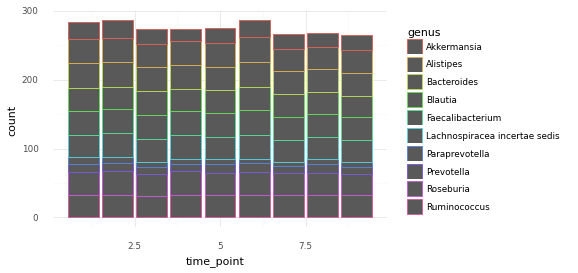

<ggplot: (8730771788222)>

In [48]:
ggplot(prevalence.dropna()) + aes(x="time_point", color="genus") + geom_bar()

The graphs above and bellow display the ten most prevalent taxa

In [49]:
prevotella = micom_ready[micom_ready.genus == "Prevotella"].dropna()

/users/sswegle/miniconda3/envs/micom/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/users/sswegle/miniconda3/envs/micom/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: prevotella_two.png


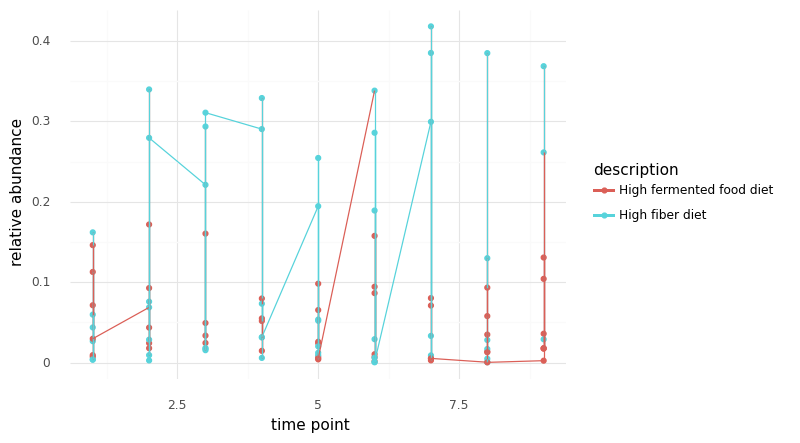

<ggplot: (8730763260603)>

In [50]:
pl = ggplot(prevotella) + aes(x="time_point", y="relative", color="description", group="id") + geom_point() + geom_line() + labs(y= "relative abundance", x= "time point")
pl.save("prevotella_two.png", dpi=600)
pl

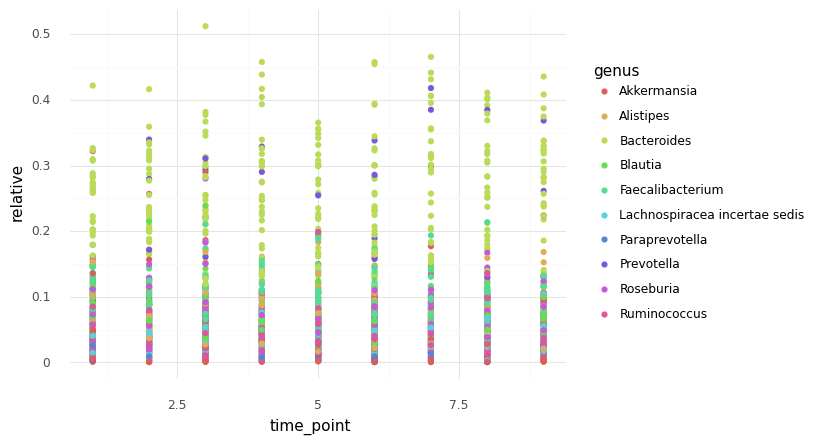

<ggplot: (8730771755424)>

In [51]:
ggplot(prevalence.dropna()) + aes(x="time_point", y="relative", color="genus") + geom_point()

In [52]:
micom_ready[micom_ready.genus == "Bacteroides"]

,sample_id,abundance,genus,id,relative,description,time_point
5,SRR15032078,5375,Bacteroides,Bacteroides,0.282984,High fiber diet,8
47,SRR15032130,2992,Bacteroides,Bacteroides,0.221138,High fiber diet,5
81,SRR15032141,2149,Bacteroides,Bacteroides,0.230456,High fiber diet,6
111,SRR15032161,13505,Bacteroides,Bacteroides,0.183577,High fiber diet,7
158,SRR15032288,2250,Bacteroides,Bacteroides,0.224753,High fiber diet,4
...,...,...,...,...,...,...,...
10874,SRR15032457,9898,Bacteroides,Bacteroides,0.230836,High fiber diet,6
10918,SRR15032473,15641,Bacteroides,Bacteroides,0.283861,High fiber diet,3
10960,SRR15032475,13995,Bacteroides,Bacteroides,0.248544,High fiber diet,4
11006,SRR15032476,10712,Bacteroides,Bacteroides,0.203778,High fiber diet,2


In [53]:
micom_ready[micom_ready.id == "8013"]

,sample_id,abundance,genus,id,relative,description,time_point


id needs to be unique for each sample in a species 

In [54]:
!pip install -U micom

In [55]:
prevalence["id"] = prevalence.genus

In [56]:
prevalence

,sample_id,abundance,genus,id,relative,description,time_point
2,SRR15032078,1886,Akkermansia,Akkermansia,0.099295,High fiber diet,8
3,SRR15032078,1100,Alistipes,Alistipes,0.057913,High fiber diet,8
5,SRR15032078,5375,Bacteroides,Bacteroides,0.282984,High fiber diet,8
8,SRR15032078,1618,Blautia,Blautia,0.085185,High fiber diet,8
21,SRR15032078,1494,Faecalibacterium,Faecalibacterium,0.078656,High fiber diet,8
...,...,...,...,...,...,...,...
11060,SRR15032489,3082,Blautia,Blautia,0.124244,High fiber diet,5
11069,SRR15032489,2465,Faecalibacterium,Faecalibacterium,0.099371,High fiber diet,5
11074,SRR15032489,1120,Lachnospiracea incertae sedis,Lachnospiracea incertae sedis,0.045150,High fiber diet,5
11081,SRR15032489,1117,Roseburia,Roseburia,0.045029,High fiber diet,5


In [57]:
top_ten_plot = ggplot(prevalence.dropna()) + aes(x="factor(time_point)", y="relative", color="genus") + geom_point()

In [58]:
top_ten_plot.save("poster_visualization.jpg", dpi=300)

/users/sswegle/miniconda3/envs/micom/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/users/sswegle/miniconda3/envs/micom/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: poster_visualization.jpg


In [59]:
!pip install "cobra==0.23.0"

In [60]:
import cobra
cobra.__version__

'0.23.0'

In [61]:
from micom.workflows import build

manifest = build(prevalence, out_folder="models", model_db="/proj/gibbons/refs/micom_dbs/agora103_genus.qza", cutoff=0.0001, threads=10)

[05:43:27] WARNING  Found existing models for 311 samples. Will skip those.       ]8;id=659253;file:///users/sswegle/miniconda3/envs/micom/lib/python3.8/site-packages/micom/workflows/build.py\build.py]8;;\:]8;id=468543;file:///users/sswegle/miniconda3/envs/micom/lib/python3.8/site-packages/micom/workflows/build.py#95\95]8;;\
                    Delete the output folder if you would like me to rebuild                 
                    them.                                                                    

Output()

In [62]:
manifest

,sample_id,description,time_point,file,found_taxa,total_taxa,found_fraction,found_abundance_fraction
0,SRR15032078,High fiber diet,8,SRR15032078.pickle,8.0,9.0,0.888889,0.944051
1,SRR15032079,High fiber diet,4,SRR15032079.pickle,7.0,8.0,0.875000,0.980700
2,SRR15032080,High fermented food diet,3,SRR15032080.pickle,6.0,7.0,0.857143,0.944933
3,SRR15032081,High fermented food diet,2,SRR15032081.pickle,7.0,8.0,0.875000,0.980887
4,SRR15032082,High fiber diet,7,SRR15032082.pickle,7.0,8.0,0.875000,0.951417
...,...,...,...,...,...,...,...,...
306,SRR15032510,High fermented food diet,2,SRR15032510.pickle,7.0,7.0,1.000000,1.000000
307,SRR15032511,High fiber diet,6,SRR15032511.pickle,7.0,8.0,0.875000,0.934429
308,SRR15032512,High fermented food diet,7,SRR15032512.pickle,6.0,7.0,0.857143,0.943218
309,SRR15032513,High fermented food diet,6,SRR15032513.pickle,7.0,8.0,0.875000,0.964311


In [63]:
from micom import load_pickle

com = load_pickle("models/SRR15032078.pickle")
print(len(com.reactions))

21734


In [64]:
from micom.qiime_formats import load_qiime_medium

In [65]:
high_fiber_medium = load_qiime_medium("/proj/gibbons/refs/micom_media/media/vmh_high_fiber_agora.qza")

In [66]:
high_fiber_medium

,metabolite,flux,name,hmdb,kegg.compound,pubchem.compound,inchi,chebi,reaction,global_id
reaction,,,,,,,,,,
EX_etoh_m,etoh,4.558439,ethanol,HMDB00108,C00469,702.0,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",NaN,EX_etoh_m,EX_etoh(e)
EX_h2o_m,h2o,36334.267355,Water,HMDB02111,C00001,962.0,InChI=1S/H2O/h1H2,NaN,EX_h2o_m,EX_h2o(e)
EX_caro_m,caro,0.002626,beta-carotene,HMDB00561,C02094,NaN,NaN,NaN,EX_caro_m,EX_caro(e)
EX_retinol_m,retinol,0.219932,retinol,HMDB00305,C00473,445354.0,InChI=1S/C20H30O/c1-16(8-6-9-17(2)13-15-21)11-...,NaN,EX_retinol_m,EX_retinol(e)
EX_thm_m,thm,1.447120,Thiamin,HMDB00235,C00378,1130.0,InChI=1S/C12H17N4OS/c1-8-11(3-4-17)18-7-16(8)6...,NaN,EX_thm_m,EX_thm(e)
...,...,...,...,...,...,...,...,...,...,...
EX_acmana_m,acmana,0.005002,N-acetyl-D-mannosamine,HMDB01129,C00645,439281.0,InChI=1S/C8H15NO6/c1-4(12)9-5(2-10)7(14)8(15)6...,NaN,EX_acmana_m,EX_acmana(e)
EX_MGlcn188_m,MGlcn188,0.004624,mucin-type O-glycan No 188,NaN,NaN,NaN,NaN,NaN,EX_MGlcn188_m,EX_MGlcn188(e)
EX_no2_m,no2,0.001486,Nitrite,HMDB02786,C00088,24529.0,"InChI=1S/HNO2/c2-1-3/h(H,2,3)/p-1",NaN,EX_no2_m,EX_no2(e)


In [67]:
fermented_food_medium = load_qiime_medium("/proj/gibbons/refs/micom_media/media/vmh_fermented_agora.qza")

In [68]:
fermented_food_medium

,metabolite,flux,name,hmdb,kegg.compound,pubchem.compound,inchi,chebi,reaction,global_id
reaction,,,,,,,,,,
EX_10fthf_m,10fthf,0.000041,10-Formyltetrahydrofolate,HMDB00972,C00234,122347.0,NaN,NaN,EX_10fthf_m,EX_10fthf(e)
EX_5mthf_m,5mthf,0.000060,5-Methyltetrahydrofolate,HMDB01396,C00440,439234.0,NaN,NaN,EX_5mthf_m,EX_5mthf(e)
EX_ala_D_m,ala_D,0.345144,D-alanine,HMDB01310,C00133,71080.0,"InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5...",NaN,EX_ala_D_m,EX_ala_D(e)
EX_ala_L_m,ala_L,9.794952,L-alanine,HMDB00161,C00041,5950.0,"InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5...",NaN,EX_ala_L_m,EX_ala_L(e)
EX_arach_m,arach,0.112914,arachidate,HMDB02212,C06425,10467.0,InChI=1S/C20H40O2/c1-2-3-4-5-6-7-8-9-10-11-12-...,NaN,EX_arach_m,EX_arach(e)
...,...,...,...,...,...,...,...,...,...,...
EX_acmana_m,acmana,0.005002,N-acetyl-D-mannosamine,HMDB01129,C00645,439281.0,InChI=1S/C8H15NO6/c1-4(12)9-5(2-10)7(14)8(15)6...,NaN,EX_acmana_m,EX_acmana(e)
EX_MGlcn188_m,MGlcn188,0.004624,mucin-type O-glycan No 188,NaN,NaN,NaN,NaN,NaN,EX_MGlcn188_m,EX_MGlcn188(e)
EX_no2_m,no2,0.001486,Nitrite,HMDB02786,C00088,24529.0,"InChI=1S/HNO2/c2-1-3/h(H,2,3)/p-1",NaN,EX_no2_m,EX_no2(e)


In [69]:
manifest

,sample_id,description,time_point,file,found_taxa,total_taxa,found_fraction,found_abundance_fraction
0,SRR15032078,High fiber diet,8,SRR15032078.pickle,8.0,9.0,0.888889,0.944051
1,SRR15032079,High fiber diet,4,SRR15032079.pickle,7.0,8.0,0.875000,0.980700
2,SRR15032080,High fermented food diet,3,SRR15032080.pickle,6.0,7.0,0.857143,0.944933
3,SRR15032081,High fermented food diet,2,SRR15032081.pickle,7.0,8.0,0.875000,0.980887
4,SRR15032082,High fiber diet,7,SRR15032082.pickle,7.0,8.0,0.875000,0.951417
...,...,...,...,...,...,...,...,...
306,SRR15032510,High fermented food diet,2,SRR15032510.pickle,7.0,7.0,1.000000,1.000000
307,SRR15032511,High fiber diet,6,SRR15032511.pickle,7.0,8.0,0.875000,0.934429
308,SRR15032512,High fermented food diet,7,SRR15032512.pickle,6.0,7.0,0.857143,0.943218
309,SRR15032513,High fermented food diet,6,SRR15032513.pickle,7.0,8.0,0.875000,0.964311


In [70]:
micom_ready

,sample_id,abundance,genus,id,relative,description,time_point
0,SRR15032078,341,Acidaminococcus,Acidaminococcus,0.017953,High fiber diet,8
1,SRR15032078,19,Adlercreutzia,Adlercreutzia,0.001000,High fiber diet,8
2,SRR15032078,1886,Akkermansia,Akkermansia,0.099295,High fiber diet,8
3,SRR15032078,1100,Alistipes,Alistipes,0.057913,High fiber diet,8
4,SRR15032078,643,Anaerostipes,Anaerostipes,0.033853,High fiber diet,8
...,...,...,...,...,...,...,...
11080,SRR15032489,82,Romboutsia,Romboutsia,0.003306,High fiber diet,5
11081,SRR15032489,1117,Roseburia,Roseburia,0.045029,High fiber diet,5
11082,SRR15032489,1453,Ruminococcus,Ruminococcus,0.058575,High fiber diet,5
11083,SRR15032489,248,Ruminococcus2,Ruminococcus2,0.009998,High fiber diet,5


In [71]:
micom_ready.to_csv("micom_ready.csv")

In [72]:
from micom.workflows import build

manifest = build(micom_ready, out_folder="models2", model_db="/proj/gibbons/refs/micom_dbs/agora103_genus.qza", cutoff=0.0001, threads=10)

[05:45:24] WARNING  Found existing models for 311 samples. Will skip those.       ]8;id=356;file:///users/sswegle/miniconda3/envs/micom/lib/python3.8/site-packages/micom/workflows/build.py\build.py]8;;\:]8;id=444831;file:///users/sswegle/miniconda3/envs/micom/lib/python3.8/site-packages/micom/workflows/build.py#95\95]8;;\
                    Delete the output folder if you would like me to rebuild                 
                    them.                                                                    

Output()

In [73]:
manifest

,sample_id,description,time_point,file,found_taxa,total_taxa,found_fraction,found_abundance_fraction
0,SRR15032078,High fiber diet,8,SRR15032078.pickle,24.0,37.0,0.648649,0.889586
1,SRR15032079,High fiber diet,4,SRR15032079.pickle,21.0,25.0,0.840000,0.942212
2,SRR15032080,High fermented food diet,3,SRR15032080.pickle,16.0,27.0,0.592593,0.855661
3,SRR15032081,High fermented food diet,2,SRR15032081.pickle,11.0,17.0,0.647059,0.898909
4,SRR15032082,High fiber diet,7,SRR15032082.pickle,23.0,33.0,0.696970,0.908204
...,...,...,...,...,...,...,...,...
306,SRR15032510,High fermented food diet,2,SRR15032510.pickle,21.0,28.0,0.750000,0.881483
307,SRR15032511,High fiber diet,6,SRR15032511.pickle,22.0,32.0,0.687500,0.799526
308,SRR15032512,High fermented food diet,7,SRR15032512.pickle,23.0,37.0,0.621622,0.843232
309,SRR15032513,High fermented food diet,6,SRR15032513.pickle,19.0,30.0,0.633333,0.839063


In [74]:
manifest.to_csv("manifest.csv")

In [75]:
from micom import load_pickle

com = load_pickle("models2/SRR15032078.pickle")
print(len(com.reactions))

51087


In [76]:
from micom.workflows import grow

res = grow(manifest, model_folder="models2", medium=high_fiber_medium, tradeoff=0.5, threads=10)

Output()

/users/sswegle/miniconda3/envs/micom/lib/python3.8/site-packages/micom/workflows/grow.py:199: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [ ]:
from micom.workflows import tradeoff

tradeoff_rates = tradeoff(manifest, model_folder="models2", medium=high_fiber_medium, threads=10)
tradeoff_rates.head()

In [ ]:
import micom.data as mmd

crc_results = mmd.crc_results()
crc_tradeoff = mmd.crc_tradeoff()

In [ ]:
from micom.viz import plot_tradeoff

pl = plot_tradeoff(crc_tradeoff, filename="tradeoff.html")

In [ ]:
pl

In [ ]:
pl.data.keys()

In [ ]:
pl.view()

In [ ]:
from micom.viz import plot_growth

pl = plot_growth(crc_results, filename="growth_rates.html")

In [ ]:
from micom.viz import plot_exchanges_per_sample

pl = plot_exchanges_per_sample(crc_results, filename="consumption.html")

In [ ]:
from micom.viz import plot_exchanges_per_taxon

pl = plot_exchanges_per_taxon(crc_results, filename="niche.html")

In [ ]:
western_diet_medium = load_qiime_medium("/proj/gibbons/refs/micom_media/media/western_diet_gut_agora.qza")

In [ ]:
western_diet_medium

In [ ]:
micom_ready

meaning of the time points: 

- baseline = 0, 1, 3
- ramp = 3
- maintenance = 4, 5, 6, 7
- choice = 8, 9


In [ ]:
micom_ready["medium"] = "standard"

In [ ]:
micom_ready

In [ ]:
micom_ready.loc[(micom_ready.time_point > 3) & (micom_ready.description == "High fiber diet"), "medium"] = "fiber_medium"
micom_ready

In [ ]:
merged = micom_ready[("sample_id", "abundance", "gennus", "id", "realative", "description", "medium")]